Function Transformer 
it is used to convert non Normal Distributional Data to Normal Distribution Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset=pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\celia\AppData\Local\Temp\ipykernel_5704\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


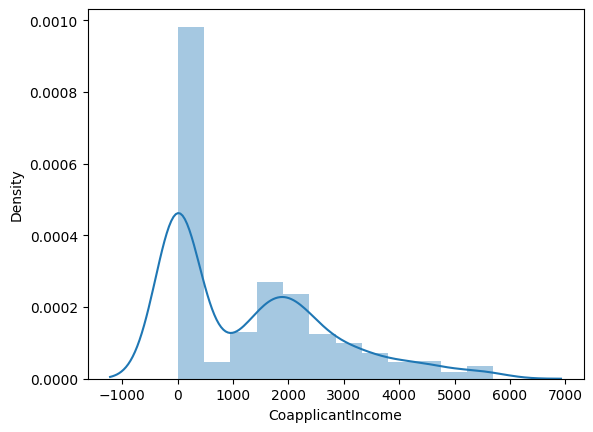

In [14]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [9]:
#first we have to remove the outlier here I used IQR OUTLIER REMOVAL METHOD
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1


In [15]:
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
min,max

(-3445.875, 5743.125)

In [13]:
dataset=dataset[dataset["CoapplicantIncome"]<=max]

In [16]:
from sklearn.preprocessing import FunctionTransformer

The log1p function in NumPy, accessed as np.log1p, computes the natural logarithm of 1+x1+x, i.e., ln⁡(1+x)ln(1+x). It is used instead of np.log in certain cases to provide numerical stability and to handle small or zero values of xx effectively. Here's why it's relevant:
# Why log1p is used in FunctionTransformer

    Numerical Stability:
        When xx is close to 0, computing ln⁡(1+x)ln(1+x) using np.log(1 + x) can lead to numerical inaccuracies due to floating-point precision issues. np.log1p is specifically designed to handle these cases accurately.

    Avoiding Errors for Non-positive Values:
        Logarithms are undefined for non-positive numbers. np.log1p allows you to safely transform data containing zero by taking ln⁡(1+x)ln(1+x), which ensures the argument of the logarithm is always positive.

    Data Preprocessing for Machine Learning:
        In machine learning, log1p is commonly used for feature scaling and transformation, especially when dealing with skewed data. Adding 1 before applying the logarithm avoids issues with zero values in the dataset, which is crucial when transforming non-negative datasets like counts or frequencies.

In [20]:
#here log1p is used so that data while training won't end up infinity due to log(0) presence.
ft=FunctionTransformer(func=np.log1p)
ft.fit(dataset[["CoapplicantIncome"]])


FunctionTransformer(func=<ufunc 'log1p'>)

In [23]:
dataset["CoapplicantIncome_ft"]=ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\celia\AppData\Local\Temp\ipykernel_5704\3367355832.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\celia\AppData\Local\Temp\ipykernel_5704\3367355832.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ft"])


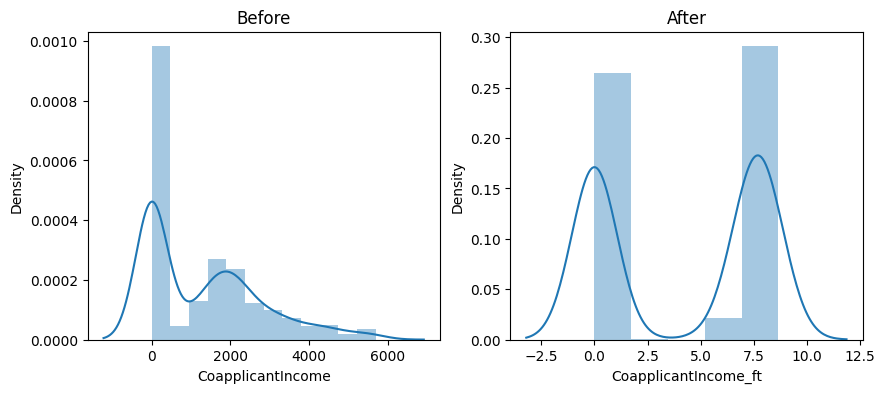

In [26]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_ft"])

plt.show()

#Here there is no tail ie is almost normal distribution


HERE WE CAN also USE X**2 INSTEAD log1p to get normal distribution,here in my dataset i got normal distribution through x**2

In [28]:
ft=FunctionTransformer(func=lambda x:x**2)
ft.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_ftx"]=ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\celia\AppData\Local\Temp\ipykernel_5704\2774880924.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\celia\AppData\Local\Temp\ipykernel_5704\2774880924.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ftx"])


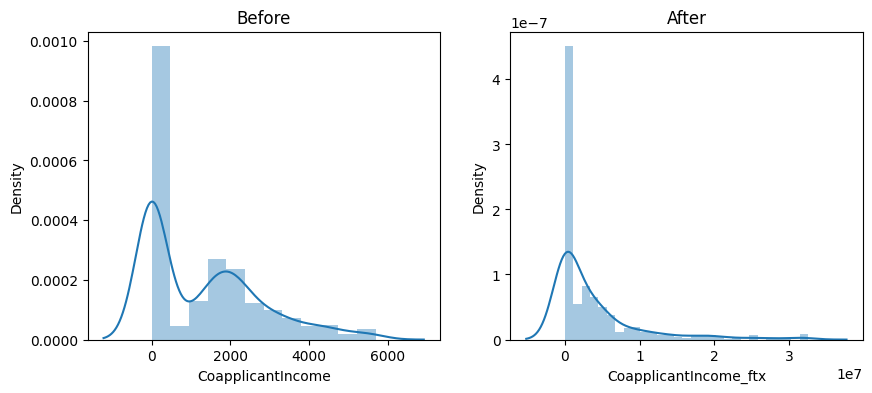

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_ftx"])

plt.show()

#Here there is no tail ie is almost normal distribution